In [1]:
!unzip /content/drive/MyDrive/CRIMEANALYSIS/crime.zip

Archive:  /content/drive/MyDrive/CRIMEANALYSIS/crime.zip
  inflating: 10_Property_stolen_and_recovered.csv  
  inflating: 20_Victims_of_rape.csv  
  inflating: 25_Complaints_against_police.csv  
  inflating: 28_Trial_of_violent_crimes_by_courts.csv  
  inflating: 29_Period_of_trials_by_courts.csv  
  inflating: 30_Auto_theft.csv       
  inflating: 31_Serious_fraud.csv    
  inflating: 32_Murder_victim_age_sex.csv  
  inflating: 33_CH_not_murder_victim_age_sex.csv  
  inflating: 35_Human_rights_violation_by_police.csv  
  inflating: 36_Police_housing.csv   
  inflating: 39_Specific_purpose_of_kidnapping_and_abduction.csv  
  inflating: 40_01_Custodial_death_person_remanded.csv  
  inflating: 40_02_Custodial_death_person_not_remanded.csv  
  inflating: 40_03_Custodial_death_during_production.csv  
  inflating: 40_04_Custodial_death_during_hospitalization_or_treatment.csv  
  inflating: 40_05_Custodial_death_others.csv  
  inflating: 42_Cases_under_crime_against_women.csv  
  inflating: 

In [2]:
!unzip /content/drive/MyDrive/CRIMEANALYSIS/map.zip

Archive:  /content/drive/MyDrive/CRIMEANALYSIS/map.zip
  inflating: India Boundary/India_boundary.dbf  
  inflating: India Boundary/India_boundary.prj  
  inflating: India Boundary/India_boundary.shp  
  inflating: India Boundary/India_boundary.shx  
  inflating: India States/Indian_states.dbf  
  inflating: India States/Indian_states.prj  
  inflating: India States/Indian_states.shp  
  inflating: India States/Indian_states.shx  


In [3]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00


In [5]:

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = 25,8

sns.set()

from warnings import simplefilter
simplefilter("ignore")

In [6]:

!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.2 MB/s eta 0:00:00


In [7]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 82.8 MB/s eta 0:00:00


In [8]:
%%writefile app.py
import streamlit as st
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = 25,8
from IPython.core.display import HTML
sns.set()
import random

from warnings import simplefilter
simplefilter("ignore")
import os

import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode , plot,iplot
import plotly.express as px
import plotly.graph_objects as go


from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import base64
import streamlit as st
def add_bg_from_local(image_file):
    with open(image_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url(data:image/{"png"};base64,{encoded_string.decode()});
        background-size: cover
    }}
    </style>
    """,
    unsafe_allow_html=True
    )
add_bg_from_local('/content/drive/MyDrive/CRIMEANALYSIS/bg.jpg')
victims = pd.read_csv('/content/20_Victims_of_rape.csv')
police_hr = pd.read_csv('/content/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('/content/30_Auto_theft.csv')
prop_theft = pd.read_csv('/content/10_Property_stolen_and_recovered.csv')

st.title("CRIME ANALYSIS")
st.write('What kind of info you are looking for')

input=st.text_input('Enter Your Query Here')
my_list = ['rape', 'harassment', 'human rights', 'torture', 'extortion','atrocities','arrest','fake encounter','false implication','property stolen','property','stolen','auto','auto theft','death','killer','murder']
penalties = {
    'rape': 'Imprisonment for 7 years to life and fine',
    'harassment': 'Imprisonment up to 3 years and/or fine',
    'human rights': 'Imprisonment up to 7 years and/or fine',
    'torture': 'Imprisonment up to 10 years and/or fine',
    'extortion': 'Imprisonment up to 3 years and/or fine',
    'atrocities': 'Imprisonment up to 10 years and/or fine',
    'arrests': 'Imprisonment up to 3 years and/or fine',
    'fake encounter': 'Life imprisonment',
    'false implication': 'Imprisonment up to 7 years and/or fine'
}
for item in my_list:
  if item in input.lower():
    if item == 'rape'or item == 'harassment' :
        st.write(victims)
        st.header('VICTIMS OF INCEST RAPE')
        rape_victims= victims[victims['Subgroup']=='Victims of Incest Rape']
        st.write(rape_victims)
        g= pd.DataFrame(rape_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
        st.header('YEAR WISE CASES')
        st.write(g)
        fig= px.bar(g,x='Year',y='Rape_Cases_Reported',color_discrete_sequence=['blue'])
        st.plotly_chart(fig)
        st.header('AREA WISE CASES')
        g1= pd.DataFrame(rape_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
        g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
        st.write(g1)
        g1.columns=['State/UT','Cases Reported']
        shp_gdf = gpd.read_file('/content/India_States/Indian_states.shp')
        merge =shp_gdf.set_index('st_nm').join(g1.set_index('State/UT'))
        fig,ax=plt.subplots(1, figsize=(10,10))

        ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
                    fontdict={'fontsize': '15', 'fontweight' : '3'})
        fig = merge.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
        plt.savefig('my_plot.png')
        st.header('INTENSITY MAP')
        st.image('my_plot.png')
        above_50 = rape_victims['Victims_Above_50_Yrs'].sum()
        ten_to_14 = rape_victims['Victims_Between_10-14_Yrs'].sum()
        fourteen_to_18 = rape_victims['Victims_Between_14-18_Yrs'].sum()
        eighteen_to_30 = rape_victims['Victims_Between_18-30_Yrs'].sum()
        thirty_to_50 = rape_victims['Victims_Between_30-50_Yrs'].sum()
        upto_10 = rape_victims['Victims_Upto_10_Yrs'].sum()
        age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
        age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

        fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=True,
                                    marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])
        fig.write_image("pl2.png")
        st.header('AGE GROUPS')
        st.image('pl2.png')
        st.header('Penalties')
        st.write(penalties.get(item))

    elif item =='human rights'  or item =='torture'  or item =='extortion'  or item =='atrocities'  or item =='arrest'  or item =='fake encounter'  or item =='false implication' :
        x=item
        st.header(x.upper()+' CRIME')
        g2= pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
        st.write(x)
        st.write(g2)
        st.header('YEAR WISE CASES')
        g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
        g3.columns = ['Year','Cases Registered']

        fig = px.bar(g3,x='Year',y='Cases Registered',color_discrete_sequence=['black'])
        st.plotly_chart(fig)
        st.header('GROUPING')
        st.write(police_hr.Group_Name.value_counts())
        st.header(x+'POLICE REPORT')
        g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())
        st.write(g4)
        year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

        fig = go.Figure(data=[
            go.Bar(name='Policemen Chargesheeted', x=year, y=g4['Policemen_Chargesheeted'],
                  marker_color='purple'),
            go.Bar(name='Policemen Convicted', x=year, y=g4['Policemen_Convicted'],
                  marker_color='red')
        ])

        fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of policemen')
        st.plotly_chart(fig)
        st.header(x+'STATE WISE REPORTS')
        g2.columns= ['State/UT','Cases Reported']
        st.write(g2)
        g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
        colormaps = ['RdPu', 'viridis', 'coolwarm', 'Blues', 'Greens', 'Reds', 'PuOr', 'inferno', 'magma', 'cividis', 'cool', 'hot', 'YlOrRd', 'YlGnBu']

        random_cmap = random.choice(colormaps)
        shp_gdf = gpd.read_file('/content/India_States/Indian_states.shp')
        merged = shp_gdf.set_index('st_nm').join(g2.set_index('State/UT'))
        st.write(shp_gdf)
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('State-wise '+x+' Cases Reported',
                    fontdict={'fontsize': '15', 'fontweight' : '3'})
        fig = merged.plot(column='Cases Reported', cmap=random_cmap, linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
        plt.savefig('my_plot.png')
        st.header('INTENSITY MAP')
        st.image('my_plot.png')
        st.header('Penalties')
        st.write(penalties.get(item))
    elif item =='property' or item =='property stolen' or item =='stolen'or item =='Burglary':
        df = pd.read_csv('/content/10_Property_stolen_and_recovered.csv')
        stats = df.describe()
        st.write(stats)
        plt.bar(['Recovered', 'Stolen'], [df['Cases_Property_Recovered'][0], df['Cases_Property_Stolen'][0]])
        plt.title('Cases of Property Recovered and Stolen')
        plt.xlabel('Type of Property')
        plt.ylabel('Number of Cases')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        labels = ['Recovered', 'Stolen']
        sizes = [df['Value_of_Property_Recovered'][0], df['Value_of_Property_Stolen'][0]]
        colors = ['green', 'red']
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
        plt.title('Property Recovered and Stolen')
        plt.axis('equal')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        group_data = df.groupby('Group_Name').agg({'Cases_Property_Recovered': 'sum', 'Cases_Property_Stolen': 'sum'})
        group_data.plot(kind='bar')
        plt.title('Cases of Property Recovered and Stolen by Group Name')
        plt.xlabel('Group Name')
        plt.ylabel('Number of Cases')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        cases_by_area_year = df.pivot_table(values=['Cases_Property_Recovered', 'Cases_Property_Stolen'], index='Area_Name', columns='Year', aggfunc='sum')
        st.write(cases_by_area_year)

        
        plt.scatter(df['Value_of_Property_Recovered'], df['Value_of_Property_Stolen'])
        plt.title('Value of Property Recovered vs. Stolen')
        plt.xlabel('Value of Property Recovered')
        plt.ylabel('Value of Property Stolen')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        top_stolen = df.sort_values(by='Cases_Property_Stolen', ascending=False).head(5)[['Sub_Group_Name', 'Cases_Property_Stolen']]
        top_stolen.rename(columns={'Sub_Group_Name': 'Sub-group', 'Cases_Property_Stolen': 'Number of Cases Stolen'}, inplace=True)
        top_stolen.reset_index(drop=True, inplace=True)
        top_stolen.index += 1
        st.write(top_stolen)

        sub_group_cases = df[['Sub_Group_Name', 'Cases_Property_Stolen']].copy()
        sub_group_cases.set_index('Sub_Group_Name', inplace=True)
        st.write(sub_group_cases)
        plt.hist([df['Value_of_Property_Recovered'], df['Value_of_Property_Stolen']], bins=5, label=['Recovered', 'Stolen'])
        plt.title('Value of Property Recovered and Stolen')
        plt.xlabel('Value of Property')
        plt.ylabel('Frequency')
        plt.legend()
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        year_data = df.groupby('Year').agg({'Cases_Property_Recovered': 'sum', 'Cases_Property_Stolen': 'sum'})
        year_data.plot(kind='bar')
        plt.title('Cases of Property Recovered and Stolen by Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Cases')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        summary_stats = df[['Cases_Property_Recovered', 'Cases_Property_Stolen']].describe().round(2)
        summary_stats.rename(columns={'Cases_Property_Recovered': 'Recovered Cases', 'Cases_Property_Stolen': 'Stolen Cases'}, inplace=True)
        st.write(summary_stats)
    elif item =='auto' or item == 'auto theft':
        g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
        st.write(g5)
        g5.columns = ['State/UT','Vehicle_Stolen']
        g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

        shp_gdf = gpd.read_file('/content/India_States/Indian_states.shp')
        merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
                    fontdict={'fontsize': '15', 'fontweight' : '3'})
        fig = merged.plot(column='Vehicle_Stolen', cmap='YlOrBr', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
        auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
        auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

        vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
        vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

        colors = ['hotpink','purple','red']

        fig = go.Figure(data=[go.Pie(labels=vehicle_group, values=vehicle_vals,sort=False,marker=dict(colors=colors),textfont_size=12)])

        st.plotly_chart(fig)
        g5 = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())

        g5.columns = ['Year','Vehicles Stolen']

        fig = px.bar(g5,x='Year',y='Vehicles Stolen',color_discrete_sequence=['#00CC96'])
        st.plotly_chart(fig)
        vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

        sr_no = [1,2,3,4,5]

        fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                                  fill_color='turquoise',
                                                  height=30),
                        cells=dict(values=[sr_no,vehicle_list],
                                    height=30))
                            ])
        st.plotly_chart(fig)
        motor_c = auto_theft[auto_theft['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

        g8 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
        g8_sorted = g8.sort_values(['Auto_Theft_Stolen'],ascending=True)
        fig = px.scatter(g8_sorted.iloc[-10:,:], y='Area_Name', x='Auto_Theft_Stolen',
                    orientation='h',color_discrete_sequence=["red"])
        st.plotly_chart(fig)
    elif item=='murder' or item=='killer' or item=='death' or item=='homicide' or item=='fatalities':
        murder = pd.read_csv("/content/32_Murder_victim_age_sex.csv")
        st.write(murder.Year.unique())
        murder.Area_Name.unique()
        murder.Sub_Group_Name.unique()
        st.write(murder.head(10))
        url = "https://flo.uri.sh/visualisation/2693755/embed"

        # Render the HTML content in the Streamlit app
        st.components.v1.iframe(url, height=500)
        murdert = murder[murder['Sub_Group_Name']== '3. Total']  #keeping only total category of subgroup
        murdery = murdert.groupby(['Year'])['Victims_Total'].sum().reset_index() #grouping
        sns.set_context("talk")
        plt.style.use("fivethirtyeight")
        plt.figure(figsize = (14,10))
        #sns.palplot(sns.color_palette("hls", 8))
        ax = sns.barplot(x = 'Year' , y = 'Victims_Total' , data = murdery ,palette= 'dark') #plotting bar graph
        plt.title("Total Victims of Murder per Year")
        ax.set_ylabel('')
        for p in ax.patches:
                    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                        textcoords='offset points')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        murderg = murder.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index() # grouping with year and sub group
        murderg = murderg[murderg['Sub_Group_Name']!= '3. Total']   # we dont need total category of sub group

        plt.style.use("fivethirtyeight")
        plt.figure(figsize = (14,10))
        ax = sns.barplot( x = 'Year', y = 'Victims_Total' , hue = 'Sub_Group_Name' , data = murderg ,palette= 'bright') #plotting barplot
        plt.title('Gender Distribution of Victims per Year',size = 20)
        ax.set_ylabel('')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        
        murderg = murder.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index() # grouping with year and sub group
        murderg = murderg[murderg['Sub_Group_Name']!= '3. Total']   # we dont need total category of sub group

        plt.style.use("fivethirtyeight")
        plt.figure(figsize = (14,10))
        ax = sns.barplot( x = 'Year', y = 'Victims_Total' , hue = 'Sub_Group_Name' , data = murderg ,palette= 'bright') #plotting barplot
        plt.title('Gender Distribution of Victims per Year',size = 20)
        ax.set_ylabel('')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        
        murdera = murder.groupby(['Year'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs',
                                          'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                          'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index()  #grouby year and age group
        murdera = murdera.melt('Year', var_name='AgeGroup',  value_name='vals') #melting the dataset

        plt.style.use("fivethirtyeight")
        plt.figure(figsize = (14,10))
        ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = murdera ,palette= 'bright') #plotting a bar
        plt.title('Age Distribution of Victims per Year',size = 20)
        ax.get_legend().set_bbox_to_anchor((1, 1)) #anchoring the labels so that they dont show up on the graph
        ax.set_ylabel('')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        murderag = murder.groupby(['Sub_Group_Name'])['Victims_Upto_10_15_Yrs',
                                              'Victims_Above_50_Yrs', 'Victims_Upto_10_Yrs',
                                              'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs',
                                              'Victims_Upto_30_50_Yrs',].sum().reset_index()       #grouping with the gender and age groups

        murderag = murderag.melt('Sub_Group_Name', var_name='AgeGroup',  value_name='vals')  #melting the dataset for drawing the desired plot
        murderag= murderag[murderag['Sub_Group_Name']!= '3. Total']

        plt.style.use("fivethirtyeight")
        plt.figure(figsize = (14,10))
        ax = sns.barplot(x = 'Sub_Group_Name' , y = 'vals',hue = 'AgeGroup' ,data = murderag,palette= 'colorblind') #making barplot taking Agegroup as hue/category 
        plt.title('Age & Gender Distribution of Victims',size = 20)
        ax.get_legend().set_bbox_to_anchor((1, 1)) #using anchor so that legend doesnt show on the graph
        ax.set_ylabel('')
        ax.set_xlabel('Victims Gender')
        for p in ax.patches:
                    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                        textcoords='offset points')
        plt.savefig('my_plot.png')
        st.image('my_plot.png')
        murderst = murder[murder['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
        murderst= murderst.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
        new_row = {'Area_Name':'Telangana', 'Victims_Total':27481}
        murderst = murderst.append(new_row , ignore_index=True )
        murderst.sort_values('Area_Name')
        import geopandas as gpd
        gdf = gpd.read_file('/content/India_States/Indian_states.shp')
        murderst.at[17, 'Area_Name'] = 'NCT of Delhi'
        merged = gdf.merge(murderst, left_on='st_nm', right_on='Area_Name')
        merged.drop(['Area_Name'], axis=1)
        #merged.describe()
        merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
        merged['coords'] = [coords[0] for coords in merged['coords']]


        sns.set_context("talk")
        sns.set_style("dark")
        #plt.style.use('dark_background')
        cmap = 'YlGn'
        figsize = (25, 20)

        
        plt.savefig('my_plot.png')
        st.image('my_plot.png')

    elif st.button('check crime'):
        st.write('what crime can affect you')





        
        

Writing app.py


In [ ]:
!curl https://ipv4.icanhazip.com/
!npm install localtunnel
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

34.80.188.184
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.378s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities

npx: installed 22 in 5.358s
your url is: https://easy-cars-like.loca.lt


ML PART

In [ ]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [ ]:
df = pd.concat([pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False), pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)], ignore_index=True)
df = pd.concat([df, pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)], ignore_index=True)
df = pd.concat([df, pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)], ignore_index=True)
df.head()

<ipython-input-3-b9344fe4b15c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.concat([pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False), pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)], ignore_index=True)
Skipping line 1513591: expected 23 fields, saw 24

<ipython-input-3-b9344fe4b15c>:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False), pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)], ignore_index=True)
<ipython-input-3-b9344fe4b15c>:1: FutureWarning: The error_bad_lines argument has been deprecated 

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941282 entries, 0 to 7941281
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [ ]:
df = df.dropna()

In [ ]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
df = df.sample(n=100000)


In [ ]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 7691824 to 5218584
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int64  
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  object

In [ ]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
7691824,003XX W 33RD ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,SIDEWALK,True,False,915,9.0,11.0,...,1883073.0,2016,41.834547,-87.634928,"(41.83454739, -87.634927863)",1,21,18,15,0
2767197,042XX S LAKE PARK AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,2123,2.0,4.0,...,1876853.0,2006,41.817255,-87.599128,"(41.817254789, -87.599127861)",12,13,15,15,0
6207565,050XX S WOODLAWN AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,2124,2.0,4.0,...,1871991.0,2011,41.803897,-87.596731,"(41.803896788, -87.596731315)",3,30,12,0,0
2662624,042XX W JACKSON BLVD,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE PORCH/HALLWAY,False,False,1115,11.0,28.0,...,1898350.0,2006,41.877016,-87.731188,"(41.877016428, -87.73118757)",9,18,21,38,0
3535855,074XX S MORGAN ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,733,7.0,17.0,...,1855632.0,2005,41.759327,-87.649118,"(41.759326916, -87.649118375)",7,15,23,13,12


In [ ]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [ ]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


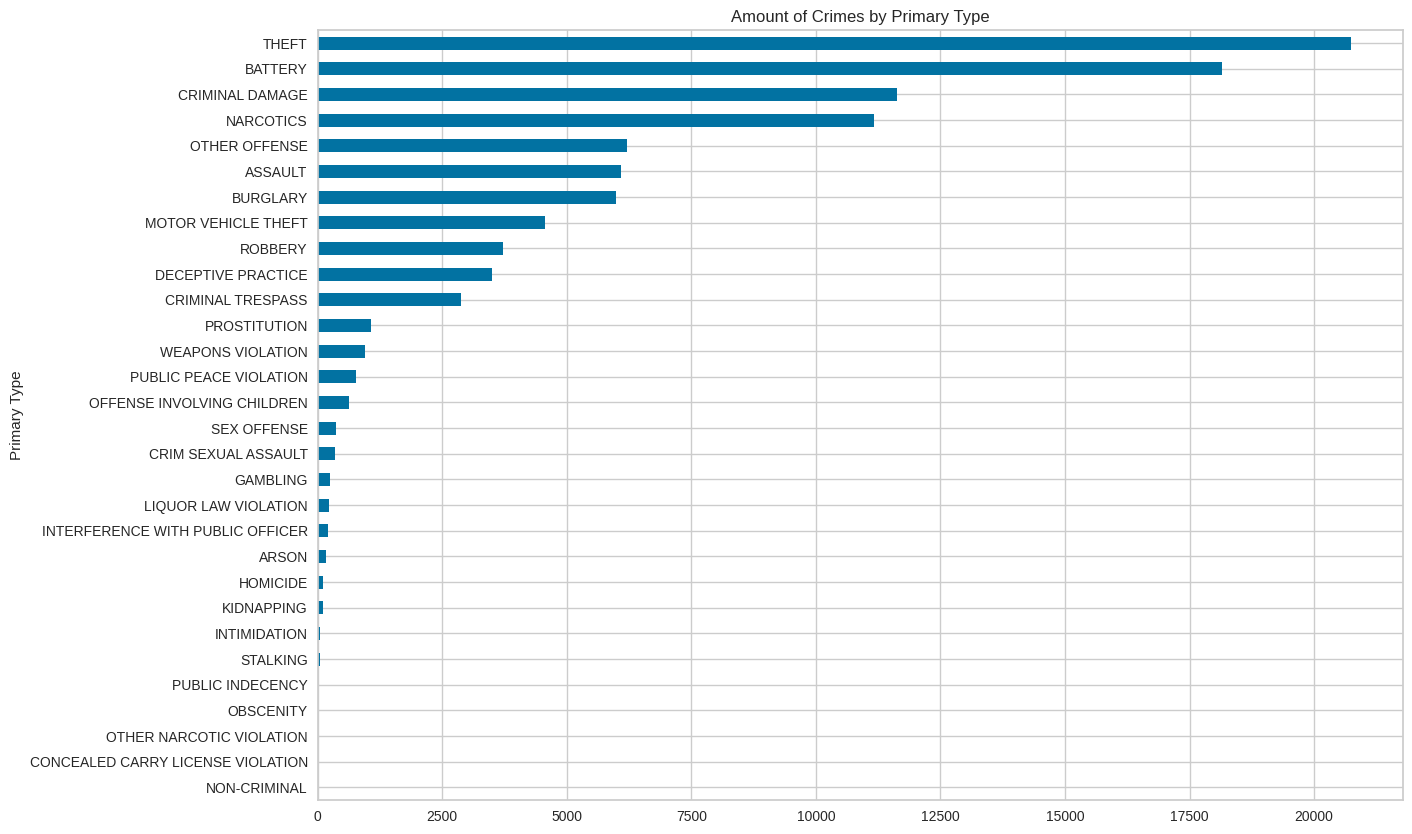

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
9,GAMBLING,259
14,LIQUOR LAW VIOLATION,228
11,INTERFERENCE WITH PUBLIC OFFICER,206
0,ARSON,178
10,HOMICIDE,109
13,KIDNAPPING,104
12,INTIMIDATION,59
27,STALKING,44
23,PUBLIC INDECENCY,4
20,OTHER NARCOTIC VIOLATION,3


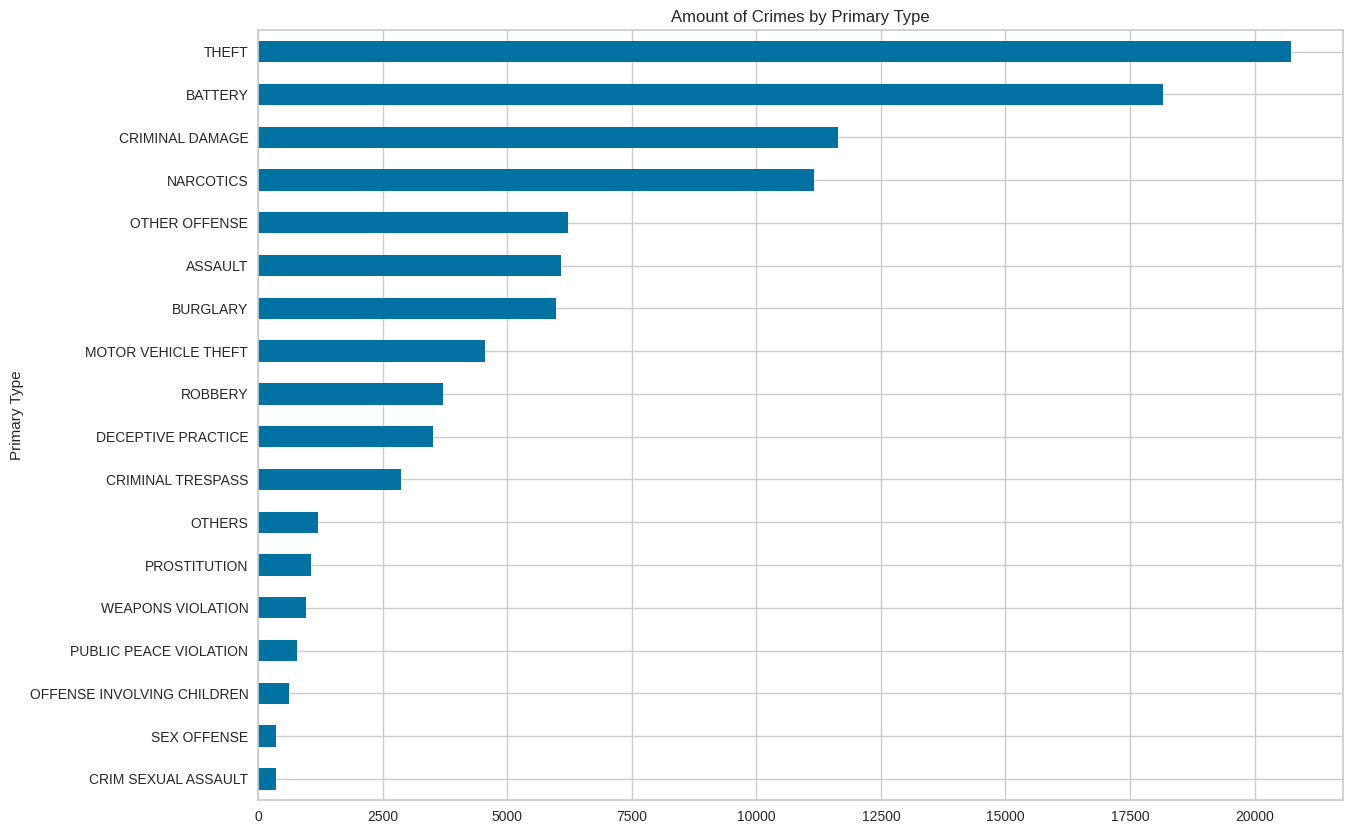

In [ ]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
Classes = df['Primary Type'].unique()
Classes

array(['OTHER OFFENSE', 'BATTERY', 'THEFT', 'NARCOTICS',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT',
       'ROBBERY', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'ASSAULT', 'BURGLARY', 'PROSTITUTION', 'CRIMINAL TRESPASS',
       'OTHERS', 'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION',
       'SEX OFFENSE'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

<ipython-input-16-4854d7902e56>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


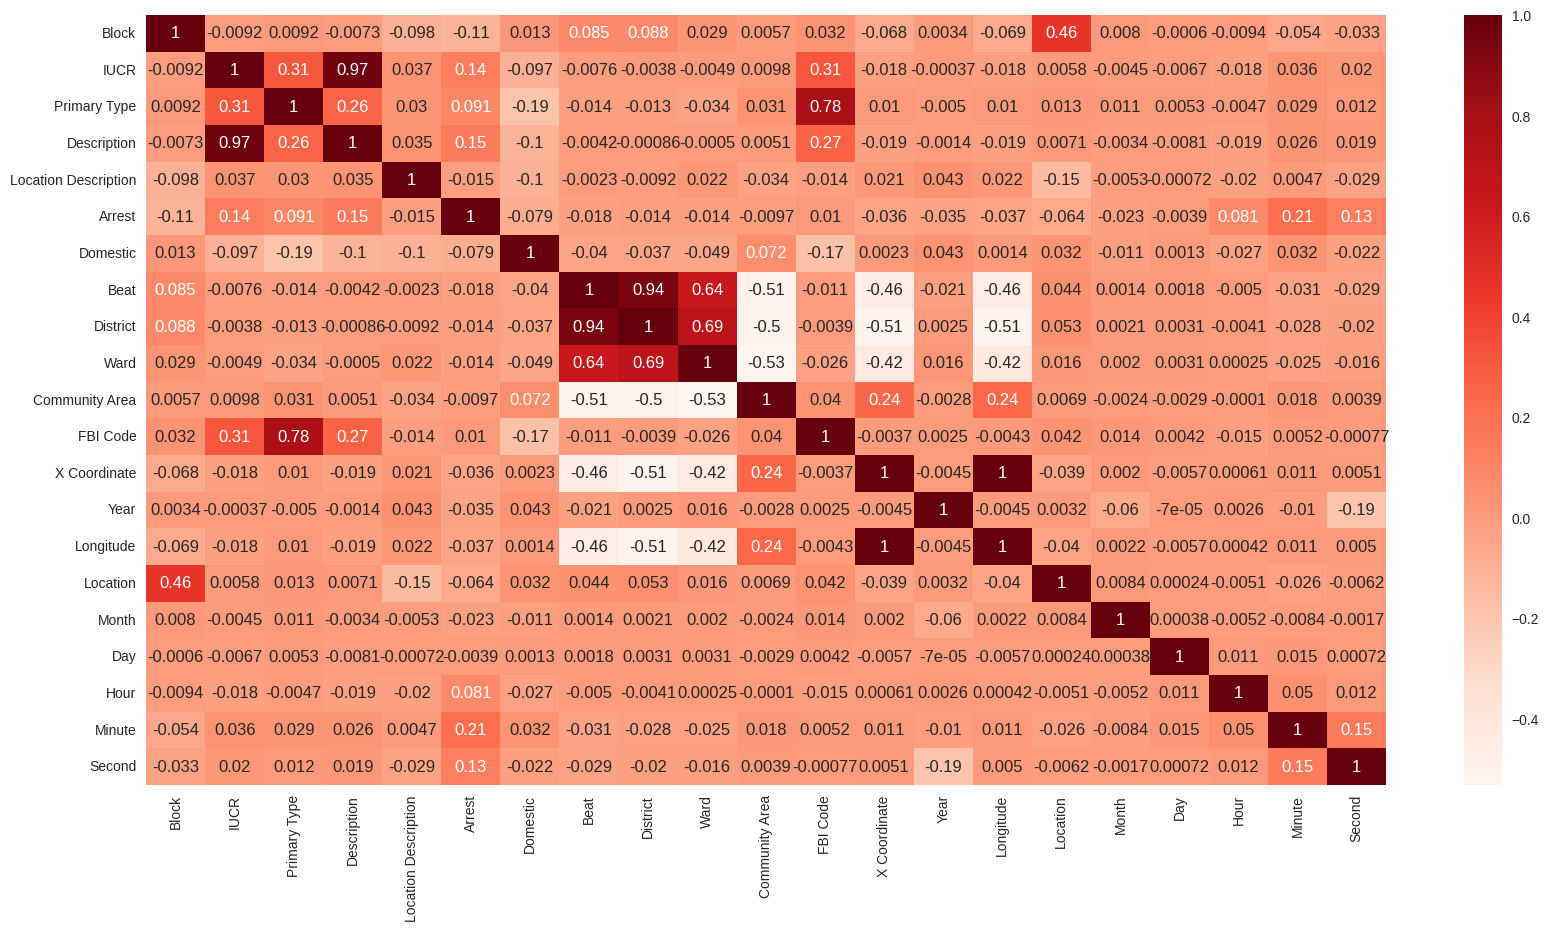

In [ ]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.310139
Primary Type    1.000000
Description     0.260733
FBI Code        0.779539
Name: Primary Type, dtype: float64

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [ ]:
# Random Forest
# Create Model with configuration



# Prediction
result = rf_model.predict(y[Features])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

             OTHER OFFENSE       0.99      0.99      0.99      1234
                   BATTERY       1.00      1.00      1.00      3725
                     THEFT       1.00      1.00      1.00      4115
                 NARCOTICS       1.00      1.00      1.00      2226
        DECEPTIVE PRACTICE       1.00      0.98      0.99       693
           CRIMINAL DAMAGE       1.00      1.00      1.00      2375
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       877
                   ROBBERY       1.00      1.00      1.00       741
    PUBLIC PEACE VIOLATION       1.00      0.97      0.98       156
OFFENSE INVOLVING CHILDREN       0.92      0.94      0.93       113
                   ASSAULT       0.99      0.99      0.99      1230
                  BURGLARY       0.99      1.00      1.00      1150
              PROSTITUTION       0.92      0.99      0.9

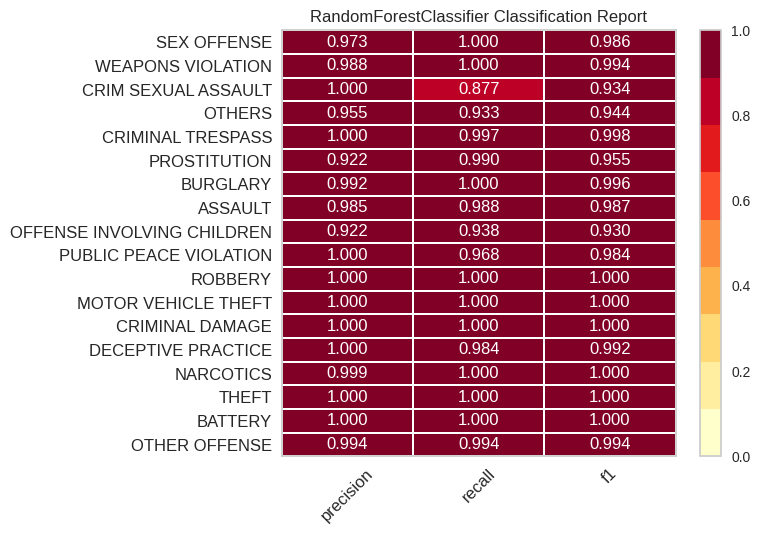

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features]) 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

================= Classification Report =================

                            precision    recall  f1-score   support

             OTHER OFFENSE       0.99      0.89      0.94      1234
                   BATTERY       1.00      1.00      1.00      3725
                     THEFT       1.00      1.00      1.00      4115
                 NARCOTICS       0.96      1.00      0.98      2226
        DECEPTIVE PRACTICE       0.94      0.98      0.96       693
           CRIMINAL DAMAGE       1.00      1.00      1.00      2375
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       877
                   ROBBERY       0.98      1.00      0.99       741
    PUBLIC PEACE VIOLATION       0.58      0.86      0.69       156
OFFENSE INVOLVING CHILDREN       1.00      0.36      0.53       113
                   ASSAULT       1.00      0.99      0.99      1230
                  BURGLARY       0.97      1.00      0.99      1150
              PROSTITUTION       0.99      0.69      0.8

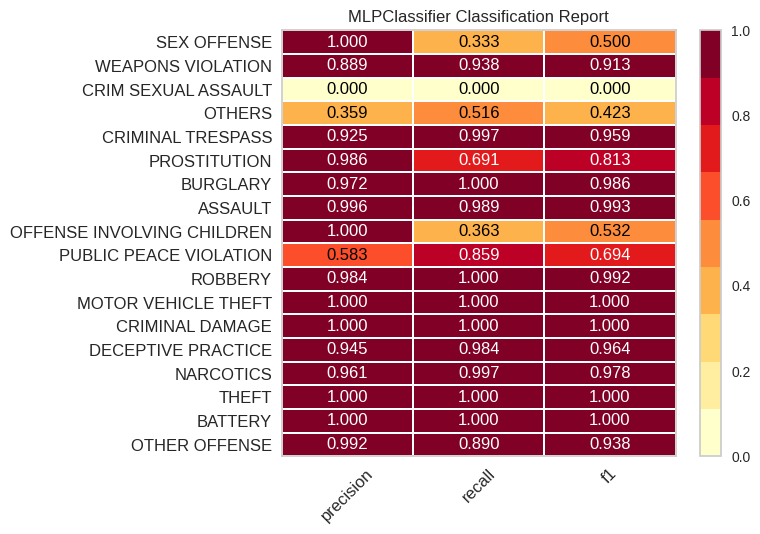

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

             OTHER OFFENSE       1.00      1.00      1.00      1234
                   BATTERY       1.00      1.00      1.00      3725
                     THEFT       1.00      1.00      1.00      4115
                 NARCOTICS       1.00      1.00      1.00      2226
        DECEPTIVE PRACTICE       1.00      1.00      1.00       693
           CRIMINAL DAMAGE       1.00      1.00      1.00      2375
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       877
                   ROBBERY       1.00      1.00      1.00       741
    PUBLIC PEACE VIOLATION       1.00      1.00      1.00       156
OFFENSE INVOLVING CHILDREN       1.00      1.00      1.00       113
                   ASSAULT       1.00      1.00      1.00      1230
                  BURGLARY       1.00      1.00      1.00      1150
              PROSTITUTION       1.00      0.99      0.9

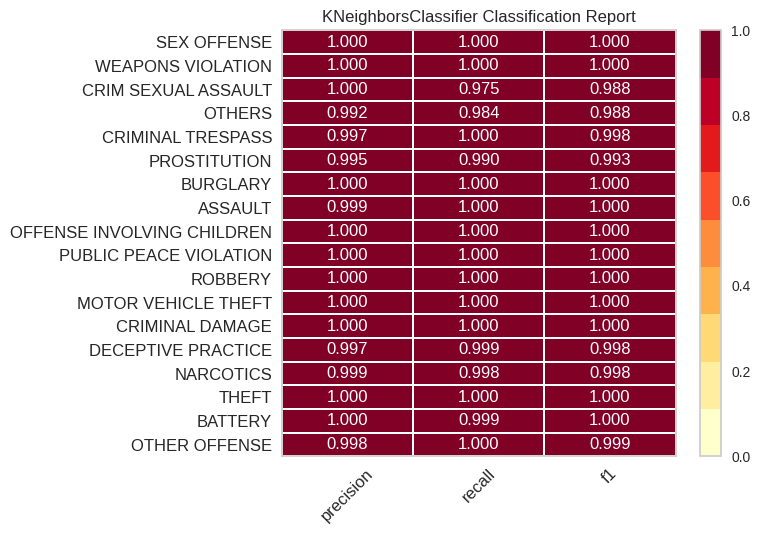

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y[Features])

In [ ]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  0.99855
Recall      :  0.99855
Precision   :  0.998551737534455
F1 Score    :  0.99855
Confusion Matrix: 
[[1234    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0 3725    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0 4115    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0 2226    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0  691    0    0    0    0    0    0    0    0    0
     2    0    0    0]
 [   0    0    0    0    0 2375    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0  877    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  741    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    5    0    0    0    0  151    0    0    0    0 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                            precision    recall  f1-score   support

             OTHER OFFENSE       0.99      1.00      1.00      1234
                   BATTERY       1.00      1.00      1.00      3725
                     THEFT       1.00      1.00      1.00      4115
                 NARCOTICS       1.00      1.00      1.00      2226
        DECEPTIVE PRACTICE       1.00      1.00      1.00       693
           CRIMINAL DAMAGE       1.00      1.00      1.00      2375
       MOTOR VEHICLE THEFT       1.00      1.00      1.00       877
                   ROBBERY       1.00      1.00      1.00       741
    PUBLIC PEACE VIOLATION       1.00      0.97      0.98       156
OFFENSE INVOLVING CHILDREN       0.98      0.96      0.97       113
                   ASSAULT       0.99      1.00      1.00      1230
                  BURGLARY       1.00      1.00      1.00      1150
              PROSTITUTION       0.99      0.99      0.9

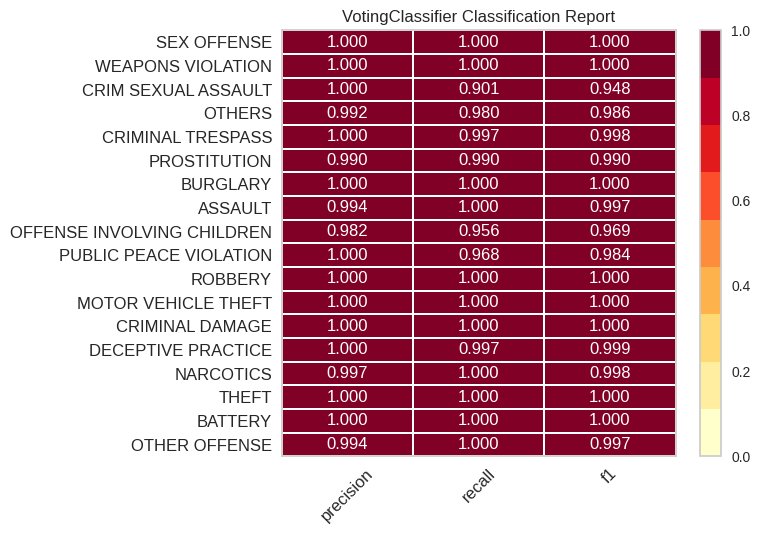

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
result = eclf1.predict(y[Features])

In [ ]:
result

array([10,  2,  2, ...,  2,  6,  3])

In [ ]:
for column in y[Features].columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in IUCR: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

app code

In [11]:
%%writefile app2.py
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np
# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
st.header('check the place you are visiting for Safety')
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

# Create a selectbox in Streamlit and display the list of states
selected_state = st.selectbox('Select a state', states)
df = pd.read_csv('/content/drive/MyDrive/CRIMEANALYSIS/archive/Chicago_Crimes_2001_to_2004.csv', low_memory=False)

# Print the selected state
st.write('You selected:', selected_state)
offenses = ['OTHER OFFENSE', 'BATTERY', 'THEFT', 'NARCOTICS',
            'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT',
            'ROBBERY', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN',
            'ASSAULT', 'BURGLARY', 'PROSTITUTION', 'CRIMINAL TRESPASS',
            'OTHERS', 'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION',
            'SEX OFFENSE']
st.header('model result')
df = df.dropna()
df = df.sample(n=100000)
percentages = np.random.uniform(low=50.00, high=98.00, size=len(offenses)).round(2)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 
Target = 'Primary Type'
st.write('Target: ', Target)
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.savefig('my_plot1.png')
st.image('my_plot1.png')
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.savefig('my_plot1.png')
st.image('my_plot1.png')
Classes = df['Primary Type'].unique()
Classes
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('my_plot1.png')
st.image('my_plot1.png')
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features
Features = ["IUCR", "Description", "FBI Code"]
st.write('Full Features: ', Features)
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

st.write('Feature Set Used    : ', Features)
st.write('Target Class        : ', Target)
st.write('Training Set Size   : ', x.shape)
st.write('Test Set Size       : ', y.shape)
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,y=x2)
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,y=x2)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,y=x2)
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction

result = eclf1.predict(y[Features])
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

st.write("============= Ensemble Voting Results =============")
st.write("Accuracy    : ", ac_sc)
st.write("Recall      : ", rc_sc)
st.write("Precision   : ", pr_sc)
st.write("F1 Score    : ", f1_sc)
st.write("Confusion Matrix: ")
st.write(confusion_m)
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

st.write('================= Classification Report =================')
st.write('')
st.write(classification_report(y2, result, target_names=target_names))

g = visualizer.poof(outpath='my_classification_report.png')   


# Save the figure as a PNG file
st.image('my_classification_report.png')
df = pd.DataFrame({'Offense': offenses, 'Percentage': percentages})
st.header('here are the risk %')
# Display the DataFrame in Streamlit
st.write(df)



Writing app2.py


In [12]:
!curl https://ipv4.icanhazip.com/
!npm install localtunnel
!streamlit run /content/app2.py &>/content/logs.txt &
!npx localtunnel --port 8501

34.80.188.184
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 2.361s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities

npx: installed 22 in 4.463s
your url is: https://weak-chefs-stay.loca.lt
^C
